# June 3: Regression With Decision Trees


## Data Loading

We are going to create a dataset on our own.  

In [0]:
import numpy as np

rng = np.random.RandomState(111)
X = np.sort(10 * rng.rand(150, 1), axis=0)
y = np.cos(X).ravel()
y[::5] += 2 * (0.5 - rng.rand(30))

## Data Exploration

#### Visualizing The Relation

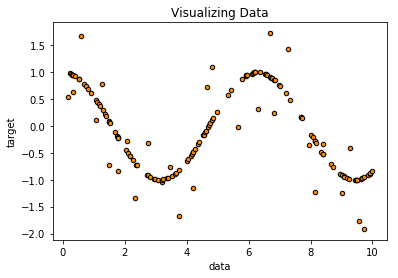

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Visualizing Data")
plt.show()

## Modeling A Regressor

### See [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) docs for parameter list, attributes etc. 


The most "relevant" parameters:
* **criterion** : _The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, and “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node. Default is "mse"._

* **splitter** : _The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. Default is "best"._

* **max_depth** : _The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Default is `None`._

* **min_samples_split** : _The minimum number of samples required to split an internal node. Default = `2`._

* **min_samples_leaf** : _The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. Default is `1`_

## TO DO: Train/Test The Data

In [0]:
# TO DO: Split the data into test (20%) and train sets.
############ Your code goes here ############
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

## TO DO: Training

In [11]:
# TO DO: Train a DecisionTreeRegressor model on train set.
from sklearn.tree import DecisionTreeRegressor

# Parameters
criterion = 'mae'
splitter = 'best'
max_depth = 4
min_samples_split = 2
min_samples_leaf = 1

############ Your code goes here ############
reg = DecisionTreeRegressor(criterion=criterion, splitter=splitter, max_depth=max_depth,\
                           min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## TO DO: Testing

In [12]:
# TO DO: Test the performance of the model trained on the test set - both mean absolute error and mean squared error
############ Your code goes here ############
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = reg.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.3226684059252344
0.17730283755660828


## Visualizing The Decision Tree Learnt

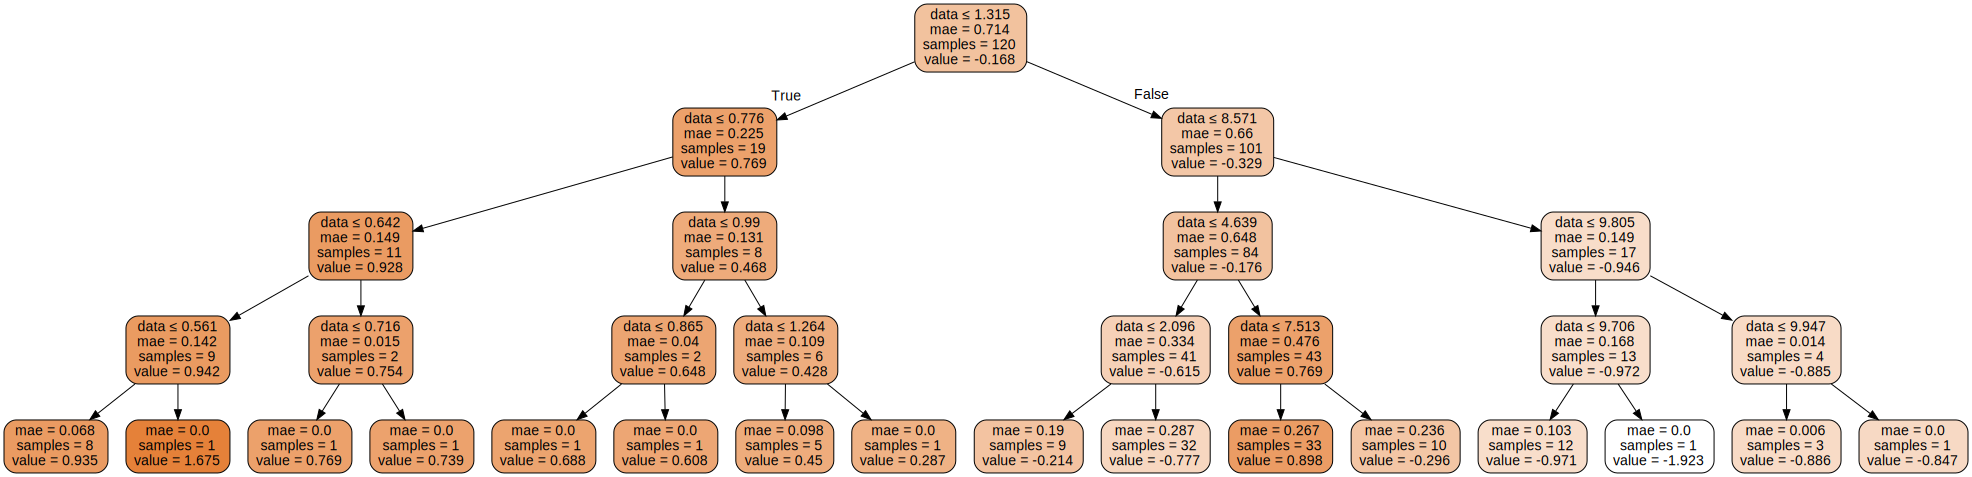

In [13]:
import graphviz
import sklearn

model = reg
dot_data = sklearn.tree.export_graphviz(model, out_file=None, 
                      feature_names=['data'],  
                      class_names=['target'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## TO DO: Regressor Visualization

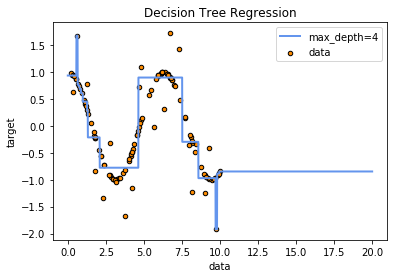

In [14]:
# Predict
X_test2 = np.arange(0.0, 20.0, 0.01)[:, np.newaxis]
############ Your code goes here ############
y_1 = reg.predict(X_test2)

# Plot
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test2, y_1, color="cornflowerblue",
         label="max_depth={}".format(max_depth), linewidth=2)
# plt.plot(X_test, y_test, color="cornflowerblue",
#          label="max_depth={}".format(max_depth), linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()